In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sms

In [2]:
data_pass = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Live-Time-Series/main/airline_passengers.csv")
data_pass.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
data_pass.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
data_pass[data_pass.isna().any(axis=1)]

,Month,Thousands of Passengers
144,International airline passengers: monthly tota...,NaN


In [5]:
data_pass.dropna(inplace=True)
data_pass.reset_index(inplace=True,drop=True)

In [6]:
data_pass.shape

(144, 2)

In [7]:
data_pass.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [8]:
data_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [9]:
data_pass["Month"] = pd.to_datetime(data_pass["Month"])
data_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [10]:
data_pass = data_pass.set_index("Month")
data_pass.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

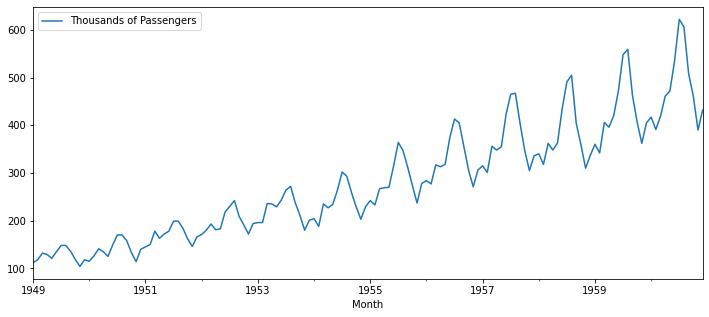

In [11]:
data_pass.plot(figsize=(12,5))

### [click here](https://www.youtube.com/watch?v=NzSyQcJ9NeE)

look at the first 26 min to understand **AUTO REGRESSOR**
1. TO FIND K VALUE WE USE PACF IN **AUTO REGRESSOR**


**ARIMA -- > USED FOR THE STATIONARY DATA**


1. CHECK THE DATA IS STATIONARY OR NOT by using point 2
2. DOING HYPOTHESIS TEST --> NAME OF TEST IS DIKICIy FULLer TEST
    1. IF TH VALUE OF **unit root** IS > 1 DATA IS NOT STATIONARY
    2. IF THE VALUE **unit root** IS < 1 DATA IS STATIONARY
    
    
    
**GUIDE LINES FOR STATIONARY DATA**
1. MEAN SHOULD BE CONSTANT
2. STD SHOULD BE CONSTANT
THE ABOVE HDATA IS NOT STATONARY

**TO MAKE THOSE DATA STATIONARY WE USE SOMEHING DIFFERENCING** 

**using shift function**

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def diccky_fuller(series):
    result = adfuller(series)
    print(f'statistical_value : {result[0]}')
    print(f'p_value : {result[1]}')
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
diccky_fuller(data_pass["Thousands of Passengers"])

statistical_value : 0.8153688792060569
p_value : 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### look above it rejected the alternative hypothesis because the data is not stationary

### lets do difference and lets see the data will be stationary

In [15]:
data_pass["difference_shift_data_1"]  = data_pass["Thousands of Passengers"] - data_pass["Thousands of Passengers"].shift(1)
data_pass.head()

,Thousands of Passengers,difference_shift_data_1
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [16]:
diccky_fuller(data_pass["difference_shift_data_1"].dropna())

statistical_value : -2.8292668241699928
p_value : 0.05421329028382636
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### look above it rejected the alternative hypothesis because the data is not stationary
### lets do difference and lets see the data will be stationary
### for 1 shift the data is not so lets try for 12

In [17]:
data_pass["difference_shift_data_12"]  = data_pass["Thousands of Passengers"] - data_pass["Thousands of Passengers"].shift(12)
data_pass.head()

,Thousands of Passengers,difference_shift_data_1,difference_shift_data_12
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,NaN
1949-04-01,129.0,-3.0,NaN
1949-05-01,121.0,-8.0,NaN


In [18]:
data_pass["difference_shift_data_2"]  = data_pass["difference_shift_data_1"] - data_pass["difference_shift_data_1"].shift(1)
data_pass.head()

,Thousands of Passengers,difference_shift_data_1,difference_shift_data_12,difference_shift_data_2
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,NaN,8.0
1949-04-01,129.0,-3.0,NaN,-17.0
1949-05-01,121.0,-8.0,NaN,-5.0


In [19]:
diccky_fuller(data_pass["difference_shift_data_2"].dropna())

statistical_value : -16.384231542468505
p_value : 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [20]:
diccky_fuller(data_pass["difference_shift_data_12"].dropna())

statistical_value : -3.383020726492481
p_value : 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

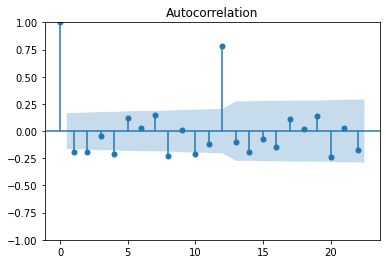

In [22]:
acf = plot_acf(data_pass["difference_shift_data_2"].dropna())

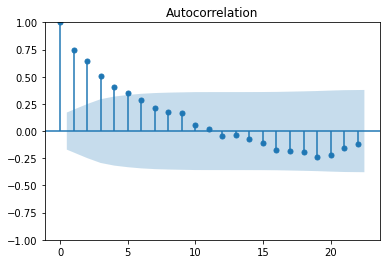

In [23]:
acf = plot_acf(data_pass["difference_shift_data_12"].dropna())

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


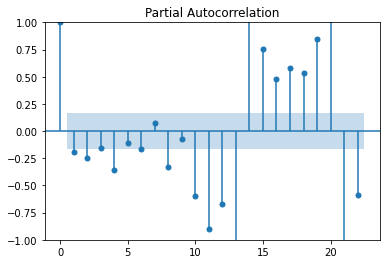

In [24]:
pacf = plot_pacf(data_pass["difference_shift_data_2"].dropna())

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


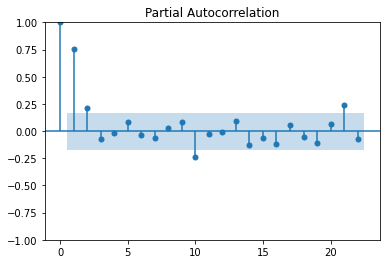

In [25]:
pacf = plot_pacf(data_pass["difference_shift_data_12"].dropna())

In [26]:
data_pass.head()

,Thousands of Passengers,difference_shift_data_1,difference_shift_data_12,difference_shift_data_2
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,NaN,8.0
1949-04-01,129.0,-3.0,NaN,-17.0
1949-05-01,121.0,-8.0,NaN,-5.0


In [27]:
data_pass.tail()

,Thousands of Passengers,difference_shift_data_1,difference_shift_data_12,difference_shift_data_2
Month,,,,
1960-08-01,606.0,-16.0,47.0,-103.0
1960-09-01,508.0,-98.0,45.0,-82.0
1960-10-01,461.0,-47.0,54.0,51.0
1960-11-01,390.0,-71.0,28.0,-24.0
1960-12-01,432.0,42.0,27.0,113.0


In [28]:
data_pass.shape

(144, 4)

In [29]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [30]:
train_data=data_pass[:train_dataset_end]
test_data=data_pass[train_dataset_end+timedelta(days=1):test_dataset_end]

In [31]:
train_data.shape

(84, 4)

In [32]:
test_data.shape

(60, 4)

In [33]:
train_data.index[0]

Timestamp('1949-01-01 00:00:00')

In [34]:
train_data.index[-1]

Timestamp('1955-12-01 00:00:00')

In [35]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [36]:
test_data.head()

,Thousands of Passengers,difference_shift_data_1,difference_shift_data_12,difference_shift_data_2
Month,,,,
1956-01-01,284.0,6.0,42.0,-35.0
1956-02-01,277.0,-7.0,44.0,-13.0
1956-03-01,317.0,40.0,50.0,47.0
1956-04-01,313.0,-4.0,44.0,-44.0
1956-05-01,318.0,5.0,48.0,9.0


**p = 10** -- > the value suddenly increases

**q = 12** -- > the value suddenly increases

**d = 2** -- > how many time dife

In [37]:
## create a ARIMA model
import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

model = sm.tsa.arima.ARIMA(train_data["Thousands of Passengers"],order=(10,2,12))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 12)   Log Likelihood                -307.723
Date:                     Tue, 01 Mar 2022   AIC                            661.446
Time:                             19:05:31   BIC                            716.801
Sample:                         01-01-1949   HQIC                           683.670
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0467      0.114      0.408      0.683      -0.178       0.271
ar.L2         -1.0426      0.083    -12.518      0.000      -1.206      -0.879
ar.L3          0.0881      0.138      0.637      0.524      -0.183       0.359
ar.L4         -1.0248      0.131     -7.848      0.000      -1.281      -0.769
ar.L5          0.0651      0.155      0.421      0.674      -0.238       0.368
ar.L6         -0.9850      0.144     -6.858      0.000      -1.266      -0.703
ar.L7          0.0170      0.142      0.120      0.905      -0.262       0.296
ar.L8         -0.9819      0.123     -7.976      0.000      -1.223      -0.741
ar.L9         -0.0070      0.095     -0.074      0.941      -0.193       0.179
ar.L10        -0.9389      0.085    -11.038      0.000      -1.106      -0.772
ma.L1         -1.2856      0.253     -5.074      0.000      -1.782      -0.789
ma.L2          1.2380      0.357      3.464      0.001       0.537       1.939
ma.L3         -1.4392      0.434     -3.315      0.001      -2.290      -0.588
ma.L4          1.3716      0.504      2.722      0.006       0.384       2.359
ma.L5         -1.2116      0.571     -2.120      0.034      -2.332      -0.092
ma.L6          1.0800      0.658      1.642      0.101      -0.209       2.369
ma.L7         -1.0670      0.714     -1.495      0.135      -2.466       0.332
ma.L8          0.8841      0.819      1.080      0.280      -0.721       2.489
ma.L9         -0.7846      0.736     -1.066      0.286      -2.227       0.658
ma.L10         0.5241      0.601      0.872      0.383      -0.653       1.702
ma.L11        -0.4140      0.455     -0.911      0.363      -1.305       0.477
ma.L12         0.1335      0.273      0.489      0.625      -0.401       0.668
sigma2        77.0666     16.117      4.782      0.000      45.478     108.656
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.71
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.58
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
pred_test = test_data.index[0]
pred_end_test = test_data.index[-1]

In [39]:
pred_test

Timestamp('1956-01-01 00:00:00')

In [40]:
pred_end_test

Timestamp('1960-12-01 00:00:00')

In [41]:
test_data.head(2)

,Thousands of Passengers,difference_shift_data_1,difference_shift_data_12,difference_shift_data_2
Month,,,,
1956-01-01,284.0,6.0,42.0,-35.0
1956-02-01,277.0,-7.0,44.0,-13.0


In [42]:
test_data.tail(2)

,Thousands of Passengers,difference_shift_data_1,difference_shift_data_12,difference_shift_data_2
Month,,,,
1960-11-01,390.0,-71.0,28.0,-24.0
1960-12-01,432.0,42.0,27.0,113.0


In [43]:
pred = model_fit.predict(start=pred_test, end=pred_end_test)
errors = test_data["Thousands of Passengers"] - pred
# errors

<AxesSubplot:ylabel='Density'>

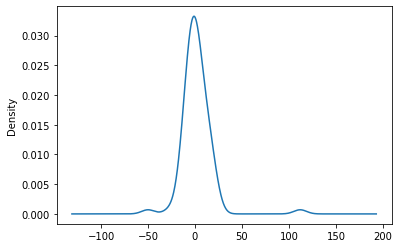

In [44]:
model_fit.resid.plot(kind='kde')

In [45]:
test_data["Arima_predicted_values"] = pred
test_data.head(1)

,Thousands of Passengers,difference_shift_data_1,difference_shift_data_12,difference_shift_data_2,Arima_predicted_values
Month,,,,,
1956-01-01,284.0,6.0,42.0,-35.0,283.267881


<AxesSubplot:xlabel='Month'>

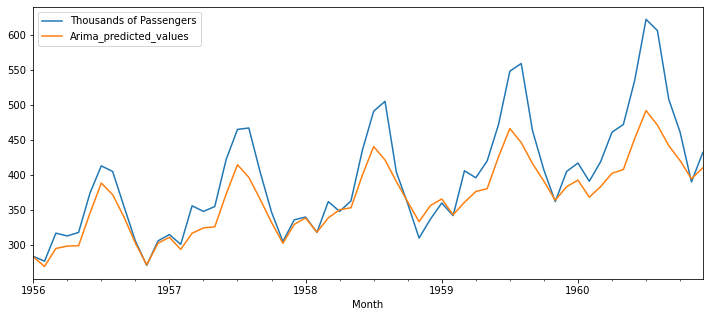

In [46]:
test_data[["Thousands of Passengers","Arima_predicted_values"]].plot(figsize=(12,5))

In [47]:
train_data.columns

Index(['Thousands of Passengers', 'difference_shift_data_1',
       'difference_shift_data_12', 'difference_shift_data_2'],
      dtype='object')

In [48]:
# statsmodels.tsa.statespace.sarimax.SARIMAX
import statsmodels
model_sarimax = statsmodels.tsa.statespace.sarimax.SARIMAX(train_data["Thousands of Passengers"],order=(10,2,2),seasonal_order=(10,2,2,12))
model_sarimax_fit = model_sarimax.fit()
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(10, 2, 2)x(10, 2, 2, 12)   Log Likelihood                -221.220
Date:                              Tue, 01 Mar 2022   AIC                            492.440
Time:                                      19:09:26   BIC                            543.951
Sample:                                  01-01-1949   HQIC                           512.505
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0410      2.832     -0.368      0.713      -6.592       4.510
ar.L2         -0.2786      1.778     -0.157      0.876      -3.763       3.206
ar.L3         -0.2562      1.441     -0.178      0.859      -3.081       2.569
ar.L4         -0.1384      1.708     -0.081      0.935      -3.487       3.210
ar.L5          0.1253      1.474      0.085      0.932      -2.763       3.014
ar.L6          0.2211      1.335      0.166      0.868      -2.396       2.838
ar.L7          0.1754      1.278      0.137      0.891      -2.330       2.681
ar.L8          0.1578      1.032      0.153      0.878      -1.864       2.180
ar.L9          0.2290      0.775      0.296      0.768      -1.289       1.747
ar.L10         0.1501      0.329      0.457      0.648      -0.494       0.794
ma.L1         -0.3229      4.750     -0.068      0.946      -9.633       8.987
ma.L2         -0.6581      3.091     -0.213      0.831      -6.717       5.401
ar.S.L12      -0.1556    462.425     -0.000      1.000    -906.493     906.182
ar.S.L24       0.3894   1058.638      0.000      1.000   -2074.504    2075.283
ar.S.L36      -0.1380    597.742     -0.000      1.000   -1171.691    1171.415
ar.S.L48      -0.4062    731.448     -0.001      1.000   -1434.017    1433.205
ar.S.L60       0.6486    361.895      0.002      0.999    -708.653     709.950
ar.S.L72       0.0251    624.429   4.03e-05      1.000   -1223.833    1223.883
ar.S.L84      -0.5923    606.558     -0.001      0.999   -1189.424    1188.239
ar.S.L96      -0.2150    998.227     -0.000      1.000   -1956.705    1956.275
ar.S.L108     -0.0609    488.799     -0.000      1.000    -958.089     957.967
ar.S.L120     -0.0153    614.969  -2.49e-05      1.000   -1205.333    1205.303
ma.S.L12      -0.2120    903.909     -0.000      1.000   -1771.842    1771.418
ma.S.L24      -0.6927   1002.372     -0.001      0.999   -1965.306    1963.921
sigma2         9.4254   1.16e+04      0.001      0.999   -2.27e+04    2.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.96   Prob(JB):                         0.52
Heteroskedasticity (H):               1.91   Skew:                             0.27
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
pred_sarimax = model_sarimax_fit.predict(start=pred_test, end=pred_end_test)
errors_sarimax = test_data["Thousands of Passengers"] - pred
# errors

In [50]:
test_data["sarimax_model_predict"] = pred_sarimax

<AxesSubplot:xlabel='Month'>

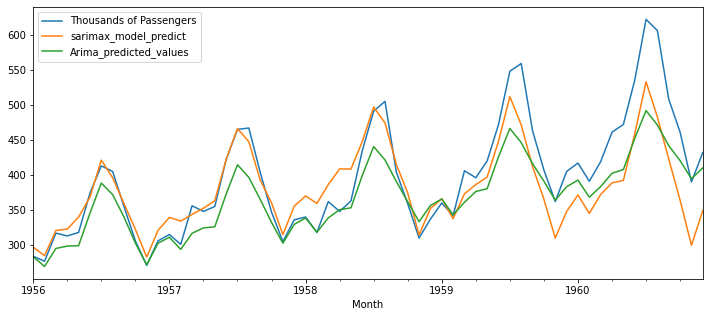

In [52]:
test_data[["Thousands of Passengers","sarimax_model_predict","Arima_predicted_values"]].plot(figsize=(12,5))